In [40]:
# read data

def read_sample():
    with open('cpusmall_scale.txt') as f:
        lines = f.readlines()

    samples = list()
    for line in lines:
        elements = line.split()

        label = float(elements[0])

        features = list(float(item.split(':')[1]) for item in elements[1:])
        features.insert(0, 1)

        sample = {
            'label': label,
            'features': features
        }
        samples.append(sample)

    # test output
    print(samples[0])
    print(len(samples))

    return samples

In [47]:
import numpy as np

def linear_regression(samples, N, repeat=1, features=12):
    print(f'N={N}, repeat={repeat}, features={features}')
    EIN_list = list()
    EOUT_list = list()


    for sample in samples:
        sample['features'] = sample['features'][:features+1]

    for i in range(repeat):
        rng = np.random.default_rng()

        # generate train & test data
        indices = list(range(len(samples)))
        select_indices = rng.choice(indices, N, replace=False)
        train_data = list(samples[i] for i in select_indices)
        test_data = list(samples[i] for i in indices if i not in select_indices)

        # calculate w_lin
        y = np.matrix(list(sample['label'] for sample in train_data)).T
        x = np.matrix(list(sample['features'] for sample in train_data))

        x_pinv = np.linalg.pinv(x)
        w_lin = x_pinv * y

        # calculate ein
        y_pred = x * w_lin
        ein = np.sum(np.square(y - y_pred))/N

        # calculate eout
        y_test = np.matrix(list(sample['label'] for sample in test_data)).T
        x_test = np.matrix(list(sample['features'] for sample in test_data))

        y_pred = x_test * w_lin
        eout = np.sum(np.square(y_test - y_pred))/(len(samples) - N)

        EIN_list.append(ein)
        EOUT_list.append(eout)
        # print(f'[{i}] ein:{ein}, eout:{eout}')

    return EIN_list, EOUT_list

{'label': 90.0, 'features': [1, -0.993496, -0.993043, -0.850291, -0.963479, -0.960727, -0.900596, -0.96642, -0.863996, -0.606175, -0.999291, 0.0811894, 0.651101]}
8192
N=32, repeat=1126, features=12
[0] ein:4.7953772965030925, eout:947.2396332820683
[1] ein:65.28450149410288, eout:943.8097373078285
[2] ein:6.216609607048184, eout:405.0951948157166
[3] ein:3.940965736492138, eout:4429.422177779924
[4] ein:17.066328008992237, eout:587.961826001015
[5] ein:110.22411827521591, eout:308.25000160996046
[6] ein:3.9304543806805965, eout:244.87809037345048
[7] ein:6.429496447063363, eout:647.2422372171749
[8] ein:3.8429174615707593, eout:1576.7725902035957
[9] ein:6.052054213995096, eout:2872.0574752464354
[10] ein:4.1639986966833895, eout:308.18122996067467
[11] ein:2.1411462851382352, eout:187.29105510088613
[12] ein:6.47582906449612, eout:225.0193989192964
[13] ein:5.172480660695266, eout:191.34891372947416
[14] ein:3.713705013453631, eout:4014.996445486612
[15] ein:5.239439051412035, eout:3

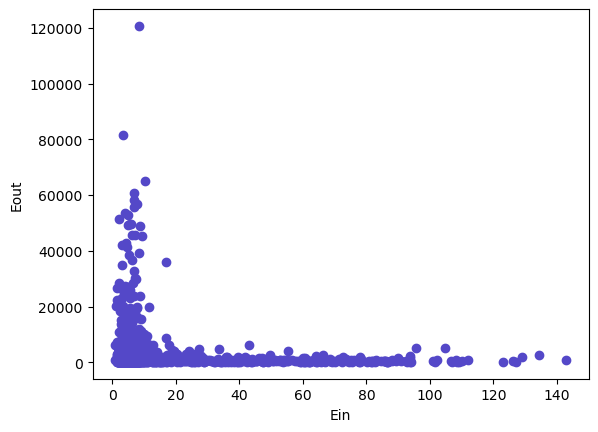

In [45]:
# problem 10
import matplotlib.pyplot as plt

samples = read_sample()
EIN_list, EOUT_list = linear_regression(samples, 32, 1126)

plt.scatter(EIN_list, EOUT_list, color="#5448C8")
plt.xlabel('Ein')
plt.ylabel('Eout')
plt.savefig('p10-scatter.png')
plt.show()
plt.close()

In [48]:
# problem 11
import numpy as np

samples = read_sample()

N_values = list(range(25, 2025, 25))
EIN_func_11 = list()
EOUT_func_11 = list()

for N in N_values:
    EIN_list, EOUT_list = linear_regression(samples, N, 16)
    EIN_func_11.append(np.mean(EIN_list))
    EOUT_func_11.append(np.mean(EOUT_list))

{'label': 90.0, 'features': [1, -0.993496, -0.993043, -0.850291, -0.963479, -0.960727, -0.900596, -0.96642, -0.863996, -0.606175, -0.999291, 0.0811894, 0.651101]}
8192
N=25, repeat=16, features=12
N=50, repeat=16, features=12
N=75, repeat=16, features=12
N=100, repeat=16, features=12
N=125, repeat=16, features=12
N=150, repeat=16, features=12
N=175, repeat=16, features=12
N=200, repeat=16, features=12
N=225, repeat=16, features=12
N=250, repeat=16, features=12
N=275, repeat=16, features=12
N=300, repeat=16, features=12
N=325, repeat=16, features=12
N=350, repeat=16, features=12
N=375, repeat=16, features=12
N=400, repeat=16, features=12
N=425, repeat=16, features=12
N=450, repeat=16, features=12
N=475, repeat=16, features=12
N=500, repeat=16, features=12
N=525, repeat=16, features=12
N=550, repeat=16, features=12
N=575, repeat=16, features=12
N=600, repeat=16, features=12
N=625, repeat=16, features=12
N=650, repeat=16, features=12
N=675, repeat=16, features=12
N=700, repeat=16, feature

In [49]:
# problem 12
import numpy as np
import matplotlib.pyplot as plt

samples = read_sample()

N_values = list(range(25, 2025, 25))
EIN_func_12 = list()
EOUT_func_12 = list()

for N in N_values:
    EIN_list, EOUT_list = linear_regression(samples, N, 16, 2)
    EIN_func_12.append(np.mean(EIN_list))
    EOUT_func_12.append(np.mean(EOUT_list))

{'label': 90.0, 'features': [1, -0.993496, -0.993043, -0.850291, -0.963479, -0.960727, -0.900596, -0.96642, -0.863996, -0.606175, -0.999291, 0.0811894, 0.651101]}
8192
N=25, repeat=16, features=2
N=50, repeat=16, features=2
N=75, repeat=16, features=2
N=100, repeat=16, features=2
N=125, repeat=16, features=2
N=150, repeat=16, features=2
N=175, repeat=16, features=2
N=200, repeat=16, features=2
N=225, repeat=16, features=2
N=250, repeat=16, features=2
N=275, repeat=16, features=2
N=300, repeat=16, features=2
N=325, repeat=16, features=2
N=350, repeat=16, features=2
N=375, repeat=16, features=2
N=400, repeat=16, features=2
N=425, repeat=16, features=2
N=450, repeat=16, features=2
N=475, repeat=16, features=2
N=500, repeat=16, features=2
N=525, repeat=16, features=2
N=550, repeat=16, features=2
N=575, repeat=16, features=2
N=600, repeat=16, features=2
N=625, repeat=16, features=2
N=650, repeat=16, features=2
N=675, repeat=16, features=2
N=700, repeat=16, features=2
N=725, repeat=16, featu

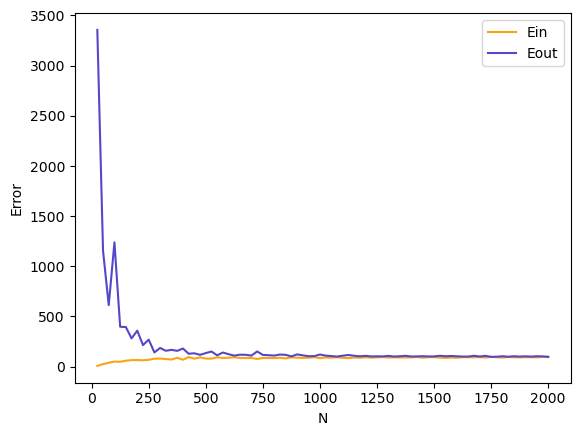

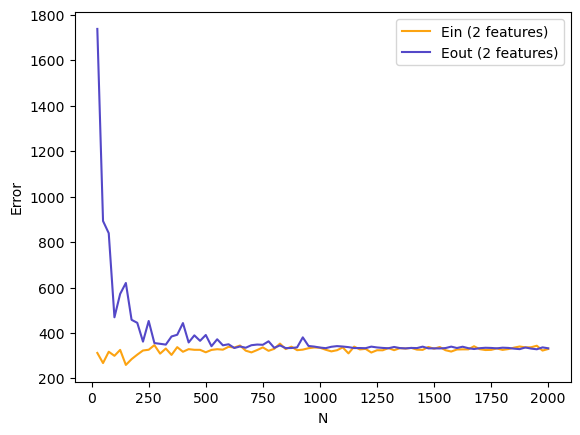

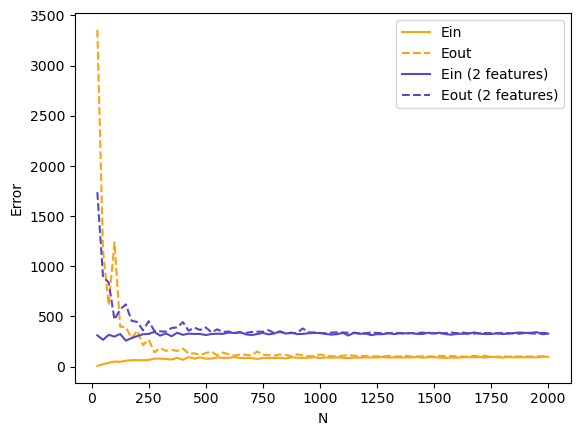

In [51]:
# Draw plot
import matplotlib.pyplot as plt

# for problem 11
plt.plot(N_values, EIN_func_11, label='Ein', color='#fCA311')
plt.plot(N_values, EOUT_func_11, label='Eout', color='#5448C8')
plt.xlabel('N')
plt.ylabel('Error')
plt.legend()
plt.savefig('p11-plot.png')
plt.show()
plt.close()

# for problem 12
plt.plot(N_values, EIN_func_12, label='Ein (2 features)', color='#fCA311')
plt.plot(N_values, EOUT_func_12, label='Eout (2 features)', color='#5448C8')
plt.xlabel('N')
plt.ylabel('Error')
plt.legend()
plt.savefig('p12-plot.png')
plt.show()
plt.close()

plt.plot(N_values, EIN_func_11, label='Ein', color='#fCA311')
plt.plot(N_values, EOUT_func_11, label='Eout', color='#fCA311', linestyle='dashed')
plt.plot(N_values, EIN_func_12, label='Ein (2 features)', color='#5448C8')
plt.plot(N_values, EOUT_func_12, label='Eout (2 features)', color='#5448C8', linestyle='dashed')
plt.xlabel('N')
plt.ylabel('Error')
plt.legend()
plt.savefig('p11-12-mix-plot.png')
plt.show()
plt.close()